# Strikeouts on the Rise: Using pybaseball to Explore Historical Team Pitching Performance
[This NY Times piece](http://www.nytimes.com/interactive/2013/03/29/sports/baseball/Strikeouts-Are-Still-Soaring.html) from 2013 showed that strikeouts are on the rise in Major League Baseball. In a simple infographic, it shows the gradual increase over time in strikeouts per game from 1900 to 2012. 

This is a brief example of how you can use pybaseball to replicate this graphic and answer other historical questions about team-level baseball statistics. 

In [1]:
from pybaseball import team_pitching
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
#collect historic team pitching data from pybaseball
pitching_data = team_pitching(2015,2021)

In [13]:
print(pitching_data.shape)

(168, 333)


In [15]:
#a quick look at the data

print(pitching_data.head())

   teamIDfg  Season Team  Age    W   L   ERA    G   GS  CG  ...    LA  \
0        28    2015  STL   28  100  62  2.94  677  162   1  ...   9.9   
1        22    2020  LAD   27   43  17  3.02  309   60   0  ...  11.1   
2        22    2021  LAD   28  106  56  3.03  762  162   1  ...  12.4   
3        21    2018  HOU   28  103  59  3.11  672  162   3  ...  11.3   
4        17    2016  CHC   29  103  58  3.15  665  162   5  ...  10.6   

   Barrels  Barrel%  maxEV  HardHit  HardHit%  Events  CStr%   CSW%  xERA  
0      183    0.043  119.2     1355     0.316    4283  0.167  0.265   NaN  
1       80    0.054  115.5      487     0.327    1489  0.175  0.292   NaN  
2      238    0.063  118.4     1313     0.346    3800  0.173  0.299   NaN  
3      196    0.053  116.5     1232     0.331    3725  0.178  0.305   NaN  
4      187    0.048  115.2     1283     0.326    3934  0.178  0.289   NaN  

[5 rows x 333 columns]


In [18]:
#a quick look at the data
print("data shape: ", format(pitching_data.shape))

print(pitching_data.head())

data shape:  (210, 333)
   teamIDfg  Season Team  Age    W   L   ERA    G   GS  CG  ...    LA  \
0        28    2015  STL   28  100  62  2.94  677  162   1  ...   9.9   
1        22    2020  LAD   27   43  17  3.02  309   60   0  ...  11.1   
2        22    2021  LAD   28  106  56  3.03  762  162   1  ...  12.4   
3        21    2018  HOU   28  103  59  3.11  672  162   3  ...  11.3   
4        17    2016  CHC   29  103  58  3.15  665  162   5  ...  10.6   

   Barrels  Barrel%  maxEV  HardHit  HardHit%  Events  CStr%   CSW%  xERA  
0      183    0.043  119.2     1355     0.316    4283  0.167  0.265   NaN  
1       80    0.054  115.5      487     0.327    1489  0.175  0.292   NaN  
2      238    0.063  118.4     1313     0.346    3800  0.173  0.299   NaN  
3      196    0.053  116.5     1232     0.331    3725  0.178  0.305   NaN  
4      187    0.048  115.2     1283     0.326    3934  0.178  0.289   NaN  

[5 rows x 333 columns]


In [19]:
# some summary stats
pitching_data.describe()

,teamIDfg,Season,Age,W,L,ERA,G,GS,CG,ShO,...,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xERA
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,...,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,0.0
mean,15.500000,2018.000000,27.985714,73.680952,73.680952,4.271762,632.214286,147.371429,1.961905,0.952381,...,12.072381,238.680952,0.063629,116.863333,1351.457143,0.354557,3832.723810,0.167290,0.274462,NaN
std,8.676124,2.004779,0.950842,21.643659,21.622426,0.572039,154.643677,35.810575,1.963416,1.114334,...,1.482852,68.928839,0.012339,1.811563,348.544026,0.025560,985.181746,0.006416,0.011972,NaN
min,1.000000,2015.000000,26.000000,19.000000,17.000000,2.940000,228.000000,58.000000,0.000000,0.000000,...,7.800000,80.000000,0.039000,113.200000,460.000000,0.286000,1268.000000,0.149000,0.249000,NaN
25%,8.000000,2016.000000,27.000000,67.000000,67.000000,3.852500,647.250000,162.000000,1.000000,0.000000,...,11.100000,209.250000,0.053000,115.600000,1344.500000,0.335250,3991.750000,0.163000,0.265250,NaN
50%,15.500000,2018.000000,28.000000,78.000000,78.000000,4.215000,682.000000,162.000000,1.000000,1.000000,...,12.200000,242.500000,0.063000,116.600000,1457.500000,0.352000,4202.500000,0.167000,0.274000,NaN
75%,23.000000,2020.000000,29.000000,89.750000,88.750000,4.687500,714.750000,162.000000,3.000000,1.000000,...,13.000000,286.000000,0.072000,118.000000,1550.250000,0.374000,4347.000000,0.171000,0.282750,NaN
max,30.000000,2021.000000,31.000000,108.000000,115.000000,5.850000,794.000000,163.000000,11.000000,5.000000,...,15.700000,411.000000,0.098000,122.200000,1829.000000,0.417000,4639.000000,0.187000,0.307000,NaN


In [22]:
# get league-average SO/game by year
league_average = pitching_data.groupby('Season', as_index=False)['K/9'].mean()

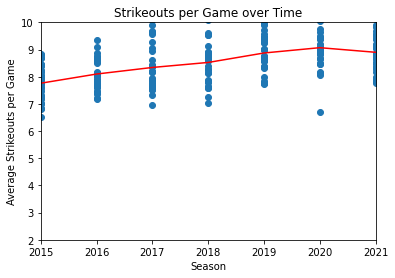

In [23]:
# plot avg. SO/game over time
plt.scatter(pitching_data['Season'], pitching_data['K/9'])
plt.plot(league_average['Season'], league_average['K/9'], c='red')
plt.xlim(2015,2021)
plt.ylim(2,10)
plt.xlabel('Season')
plt.ylabel('Average Strikeouts per Game')
plt.title('Strikeouts per Game over Time');